In [1]:
import pandas as pd 

# csv 파일 로딩
df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_14464\2254169817.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


C:\Users\user\AppData\Local\Temp\ipykernel_14464\2305593248.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

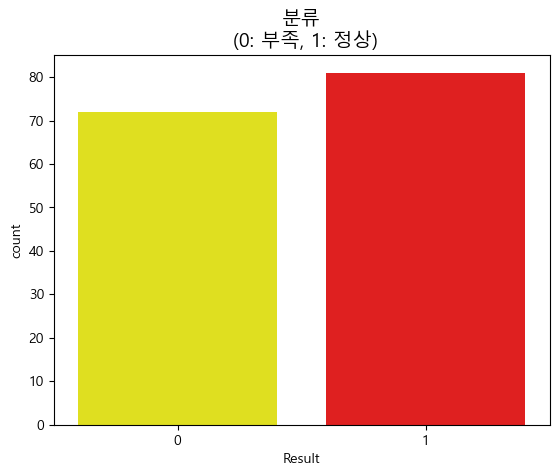

In [2]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [3]:
train_cols = ['Solar.R', 'Wind', 'Temp']
X = df[train_cols]
y = df['Result']

In [4]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [18]:
df.corr()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
Month,1.000000,-0.007962,-0.072904,-0.178293,0.420947,0.149578,0.014185
Day,-0.007962,1.000000,-0.145621,0.027181,-0.130593,-0.011460,0.066517
Solar.R,-0.072904,-0.145621,1.000000,-0.055245,0.262569,0.302927,0.211084
Wind,-0.178293,0.027181,-0.055245,1.000000,-0.457988,-0.531028,-0.352618
Temp,0.420947,-0.130593,0.262569,-0.457988,1.000000,0.608737,0.522614
Ozone,0.149578,-0.011460,0.302927,-0.531028,0.608737,1.000000,0.698721
Result,0.014185,0.066517,0.211084,-0.352618,0.522614,0.698721,1.000000


c:\python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


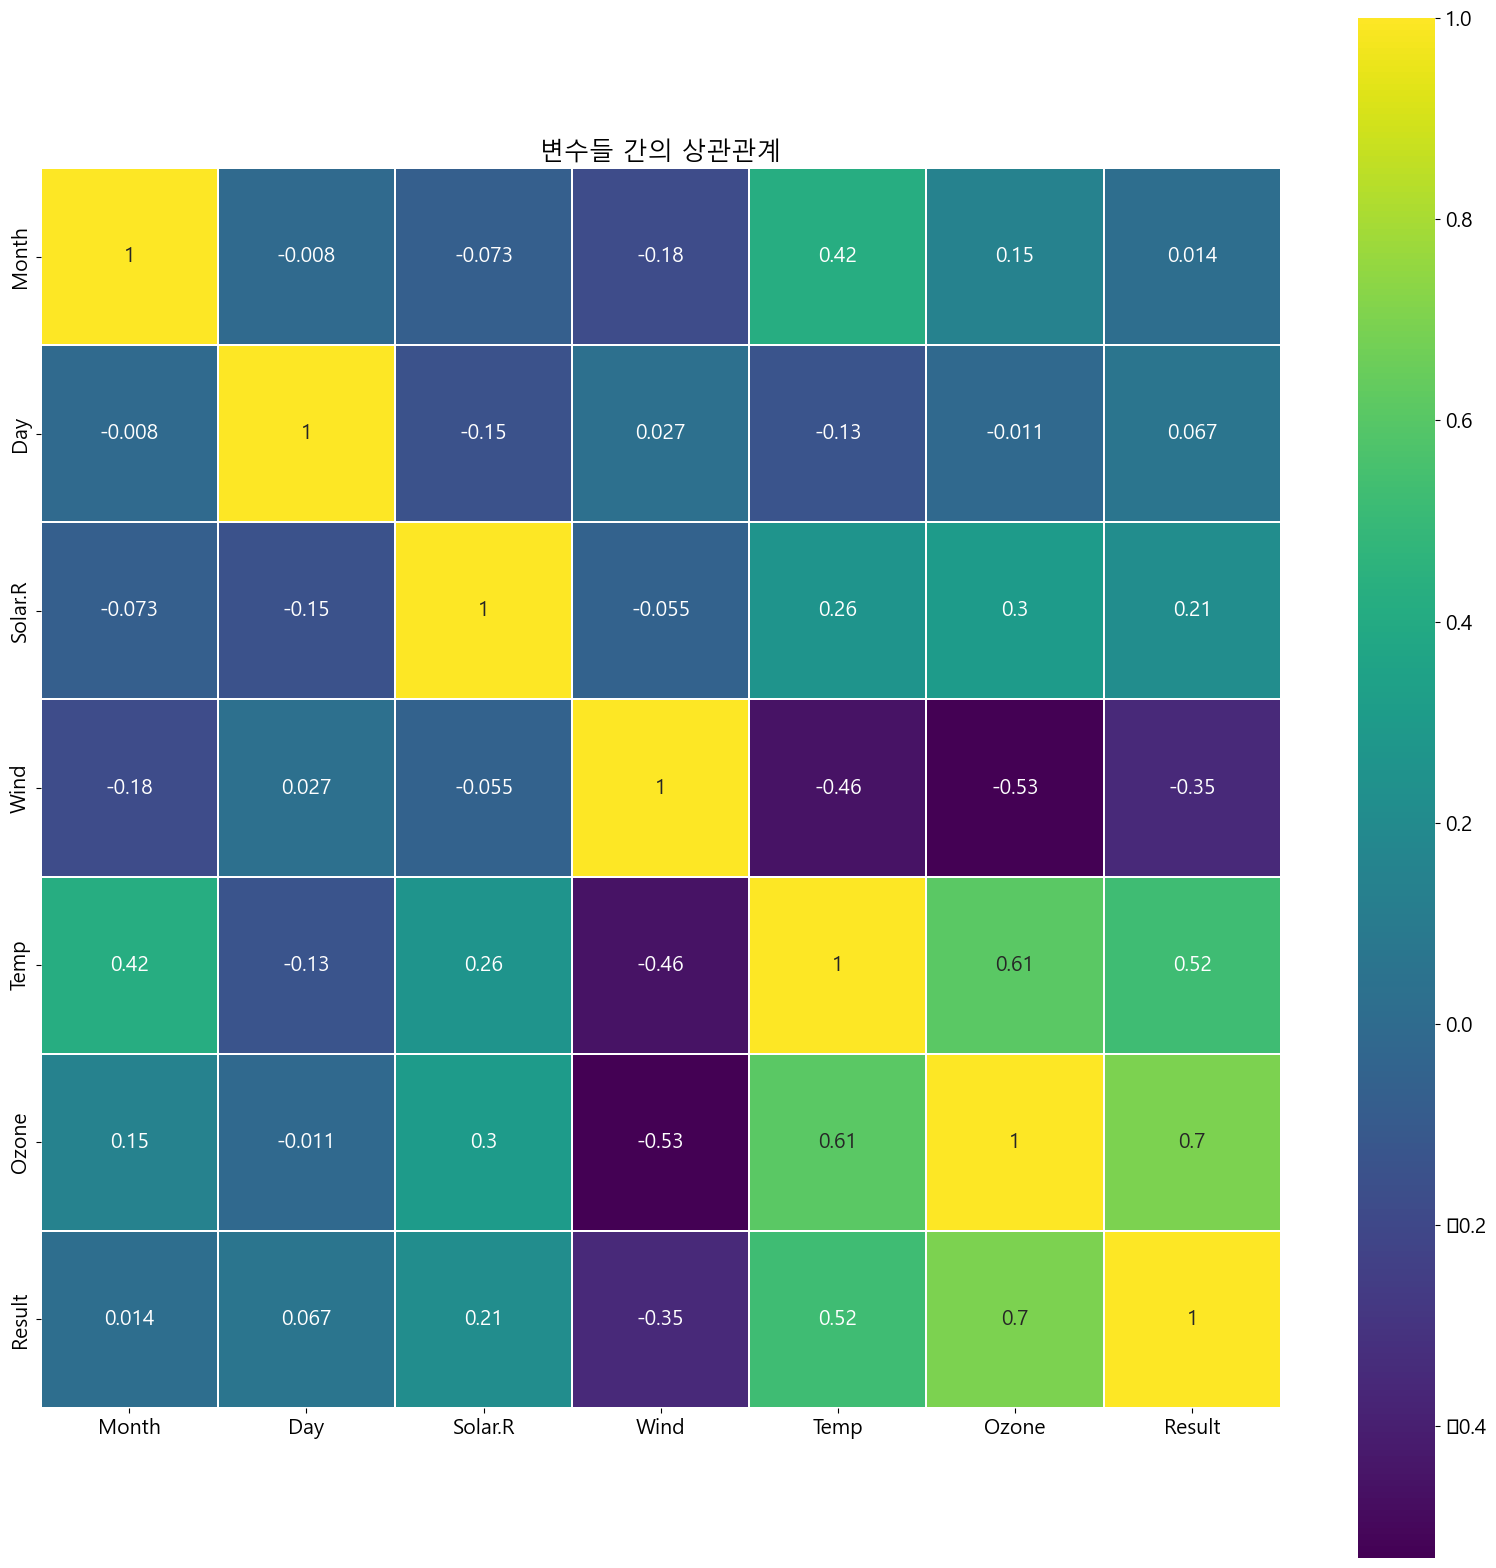

In [5]:
X = X_samp[train_cols]
y = y_samp['Result']
df_samp["Result"].value_counts()

# 상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
# Sequential : 신경망 모델
model = Sequential(name='mymodel')
model.add(Dense(128, input_shape=(len(X_train.columns), ), activation='relu', name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(64, activation='relu', name='hidden-3'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,981 (152.27 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,988 (101.52 KB)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from datetime import datetime  
import tensorflow as tf
# tensorboard --logdir=로그파일경로
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20240328-112616'

In [10]:
# pip install tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  

# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500, callbacks=[tensorboard_callback])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4388 - loss: 0.2564  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.2376 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.2221 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.2074 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.1967 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.1823 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.1735 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.1579 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7662 - loss: 0.1599 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.1656 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.1457 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - lo

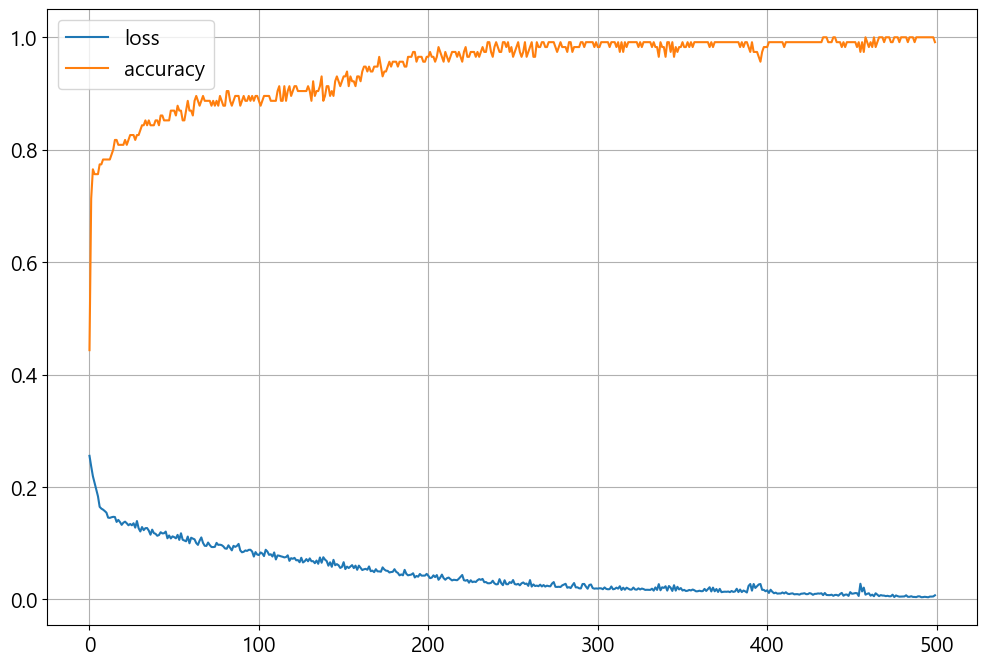

In [12]:
# 모델 학습 과정 그래프

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [13]:
# 모델 평가

scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0040 
[0.004202158655971289, 1.0]
compile_metrics: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7931 - loss: 0.1974
[0.19741831719875336, 0.7931034564971924]
compile_metrics: 79.31%


In [14]:
# 새로운 값 예측
# 일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량

test_set = [[25, 10.8, 71]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5344018]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
# 일조량 20, 풍량 4.3, 화씨온도 70도일 때의 오존량

test_set = [[20, 4.3, 70]]
test_set=scaler.transform(test_set)
print(model.predict(test_set)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.68111306]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
model.save('c:/data/ozone/ozone.keras')

In [17]:
import joblib
joblib.dump(scaler,'c:/data/ozone/scaler.model')

['c:/data/ozone/scaler.model']